In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")

In [ ]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set = dataset_train.iloc[:,1:2].values

In [ ]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
#feature scaling
#normalization
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
x_train=[]
y_train=[]
for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train, y_train= np.array(x_train), np.array(y_train)

In [ ]:
#reshaping add dimension in numpy array
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
#importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#initialising the RNN
regressor=Sequential() #reps sequence of layers, predicting continuous values (so it is a regression)

In [ ]:
from keras.layers import Dense, SimpleRNN
#adding the first LSTM and some Dropout regularisation
#dropout to prevent overfitting
regressor.add(SimpleRNN(units=50, return_sequences= True,input_shape=(x_train.shape[1], 1)))
#use lstm class and create object of lstm class - 3 args
#num of units,return sequences- set to true because is stacked lstms, and shape
#units-neurons in first layer . 50 in layers for high dimensionality , can capture upward and downward
regressor.add(Dropout(0.2))


In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import Callback
regressor.add(SimpleRNN(units=50,return_sequences=False,input_shape=(x_train.shape[1], 1)))
regressor.add(Dense(32,activation="relu"))
regressor.add(Dense(1))
regressor.compile(loss="mean_squared_error",optimizer=RMSprop(),metrics=["mse"])


In [ ]:
regressor.fit(x_train, y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 4s 47ms/step - loss: 0.0319 - mse: 0.0319
Epoch 2/20
38/38 [==============================] - 1s 38ms/step - loss: 0.0108 - mse: 0.0108
Epoch 3/20
38/38 [==============================] - 1s 26ms/step - loss: 0.0070 - mse: 0.0070
Epoch 4/20
38/38 [==============================] - 1s 25ms/step - loss: 0.0058 - mse: 0.0058
Epoch 5/20
38/38 [==============================] - 1s 25ms/step - loss: 0.0050 - mse: 0.0050
Epoch 6/20
38/38 [==============================] - 1s 25ms/step - loss: 0.0049 - mse: 0.0049
Epoch 7/20
38/38 [==============================] - 1s 29ms/step - loss: 0.0038 - mse: 0.0038
Epoch 8/20
38/38 [==============================] - 1s 25ms/step - loss: 0.0033 - mse: 0.0033
Epoch 9/20
38/38 [==============================] - 1s 26ms/step - loss: 0.0030 - mse: 0.0030
Epoch 10/20
38/38 [==============================] - 1s 25ms/step - loss: 0.0030 - mse: 0.0030
Epoch 11/20
38/38 [==============================] - 1s 26m

In [ ]:
#Making the predictions and visualising the results
dataset_test=pd.read_csv("/content/Google_Stock_Price_Train.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
input=real_stock_price.reshape(-1,1)
input=sc.transform(input)

In [ ]:

x_test=[]
for i in range(60,227):
  x_test.append(input[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


6/6 [==============================] - 0s 9ms/step


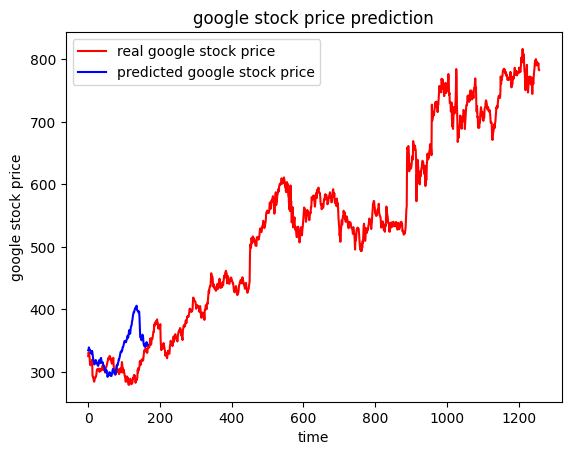

In [ ]:
#visualising the results
plt.plot(real_stock_price, color="red", label="real google stock price")
plt.plot(predicted_stock_price, color="blue",label="predicted google stock price")
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()
plt.show()

STACKED LSTM


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
time_steps= 60
model= Sequential()
model.add(Input(shape=(time_steps, 1)))
model.add(LSTM(48, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(48, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(48))
model.add(Dropout(0.2))
model.add(Dense(1, activation="relu"))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 48)            9600      
                                                                 
 dropout_4 (Dropout)         (None, 60, 48)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 48)            18624     
                                                                 
 dropout_5 (Dropout)         (None, 60, 48)            0         
                                                                 
 lstm_5 (LSTM)               (None, 48)                18624     
                                                                 
 dropout_6 (Dropout)         (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=20 )


Epoch 1/20
38/38 [==============================] - 10s 86ms/step - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 2/20
38/38 [==============================] - 3s 88ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 3/20
38/38 [==============================] - 4s 103ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 4/20
38/38 [==============================] - 4s 101ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 5/20
38/38 [==============================] - 3s 89ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 6/20
38/38 [==============================] - 3s 89ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 7/20
38/38 [==============================] - 5s 121ms/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 8/20
38/38 [==============================] - 5s 132ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 9/20
38/38 [==============================] - 3s 91ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 10/20
38

In [ ]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional,BatchNormalization


In [ ]:
window_size= 60

In [ ]:
model4 = Sequential()
model4.add(Bidirectional(LSTM(100, return_sequences=True, activation="relu", input_shape=(1,window_size))))
model4.add(Bidirectional(LSTM(50, return_sequences=True, dropout=0.5)))
model4.add(Bidirectional(LSTM(100, dropout=0.5)))
model4.add(BatchNormalization(momentum=0.6))
model4.add(Dense(1))
model4.compile(loss="mean_aquared_error", optimizer="rmsprop")